<center><img src="https://raw.githubusercontent.com/EO-College/cubes-and-clouds/main/icons/cnc_3icons_process_circle.svg"
     alt="Cubes & Clouds logo"
     style="float: center; margin-right: 10px; margin-left: 10px; max-height: 250px;" /></center>

# 2.3 Data Access and Basic Processing

<img src="https://openeo.org/images/openeo_logo.png"
     alt="openEO logo"
     style="float: center; margin-right: 10px; max-height: 100px;"/>

## Apply Operator with openEO

The apply operator applies a process to each value in the data cube (i.e. a local operation).

Let's start again with the same sample data from the Sentinel-2 STAC Collection, applying the filters directly in the `load_stac` call, to reduce the amount of data.

In [1]:
import openeo
from openeo.local import LocalConnection
local_conn = LocalConnection('')

url = "https://earth-search.aws.element84.com/v1/collections/sentinel-2-l2a"
spatial_extent = {"west": 11.259613, "east": 11.406212, "south": 46.461019, "north": 46.522237}
temporal_extent = ['2022-07-10T00:00:00Z','2022-07-13T00:00:00Z']
bands = ["red","green","blue"]
properties = {"eo:cloud_cover": dict(lt=50)}
datacube = local_conn.load_stac(url=url,
                    spatial_extent=spatial_extent,
                    temporal_extent = temporal_extent,
                    bands=bands,
                    properties=properties
)

datacube.execute()

<xarray.DataArray 'stackstac-02561e657d36043587a68a46f0f3ec54' (time: 1,
                                                                band: 3,
                                                                y: 713, x: 1145)> Size: 20MB
dask.array<getitem, shape=(1, 3, 713, 1145), dtype=float64, chunksize=(1, 1, 606, 860), chunktype=numpy.ndarray>
Coordinates: (12/54)
  * time                                     (time) datetime64[ns] 8B 2022-07...
    id                                       (time) <U24 96B 'S2B_32TPS_20220...
  * band                                     (band) <U5 60B 'red' 'green' 'blue'
  * x                                        (x) float64 9kB 6.733e+05 ... 6....
  * y                                        (y) float64 6kB 5.155e+06 ... 5....
    s2:datastrip_id                          <U64 256B 'S2B_OPER_MSI_L2A_DS_2...
    ...                                       ...
    proj:shape                               object 8B {10980}
    raster:bands                             object 8B {'nodata': 0, 'data_ty...
    common_name                              (band) <U5 60B 'red' 'green' 'blue'
    center_wavelength                        (band) float64 24B 0.665 0.56 0.49
    full_width_half_max                      (band) float64 24B 0.038 ... 0.098
    epsg                                     int64 8B 32632
Attributes:
    spec:        RasterSpec(epsg=32632, bounds=(600000.0, 5090220.0, 709800.0...
    crs:         epsg:32632
    transform:   | 10.00, 0.00, 600000.00|\n| 0.00,-10.00, 5200020.00|\n| 0.0...
    resolution:  10.0

Visualize the RGB bands of our sample dataset:

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.0999..1.8576].


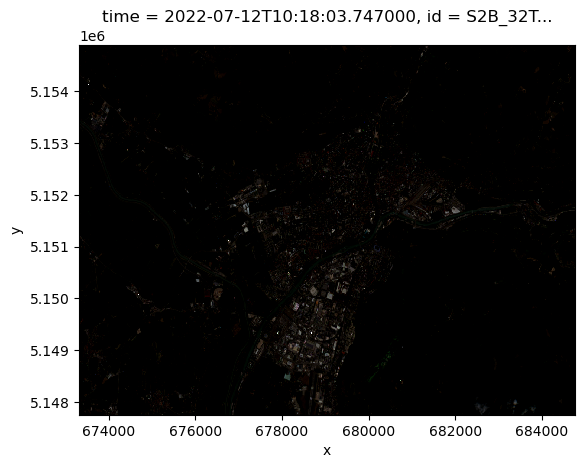

In [2]:
data = datacube.execute()
data[0].plot.imshow()

### Apply an arithmetic formula

We would like to improve the previous visualization, rescaling all the pixels between 0 and 1.

We can use `apply` in combination with the `linear_scale_range` processe.

In [3]:
from openeo.processes import linear_scale_range
input_min = -0.1
input_max = 0.2
output_min = 0
output_max = 1

def rescale(x):
    return linear_scale_range(x,input_min,input_max,output_min,output_max)

scaled_data = datacube.apply(rescale)
scaled_data

Visualize the result and see how `apply` scaled the data resulting in a more meaningful visualization:

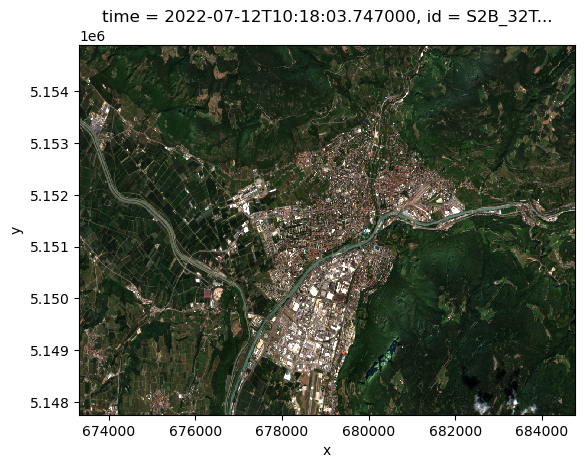

In [4]:
scaled_data_xr = scaled_data.execute()
scaled_data_xr[0].plot.imshow()